In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import re
from matplotlib.patches import Polygon
%matplotlib inline

/mnt/storage/home/ja17618/.conda/envs/vox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/mnt/storage/home/ja17618/.conda/envs/vox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
def res(obj):
    non_decimal = re.compile(r'[^\d.]+')
    return float(non_decimal.sub('', obj))
def df_preprocess(df):
    df[' power.draw [W]'] = df[' power.draw [W]'].apply(lambda x: res(x))
    df[' utilization.gpu [%]'] = df[' utilization.gpu [%]'].apply(lambda x : res(x))
    df[' clocks.current.sm [MHz]'] = df[' clocks.current.sm [MHz]'].apply(lambda x : res(x))
    df[' memory.used [MiB]'] = df[' memory.used [MiB]'].apply(lambda x : res(x))
    t0 = df[' timestamp'][0]
    tm = df[' timestamp']
    t = [int((x-t0).total_seconds()) for x in tm]
    df = df.assign(timestep = t) 
    return df 

In [6]:
vox_urban = pd.read_csv('/mnt/storage/home/ja17618/vox_urbgpu3.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
vox_urban = df_preprocess(vox_urban)
print(vox_urban.shape[0])
vox_nurban = pd.read_csv('/mnt/storage/home/ja17618/vox_nurbgpu3.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
vox_nurban = df_preprocess(vox_nurban)
print(vox_nurban.shape[0])

avod_urban = pd.read_csv('/mnt/storage/home/ja17618/avod_urbgpu3.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
avod_urban = df_preprocess(avod_urban)
print(avod_urban.shape[0])

avod_nurban = pd.read_csv('/mnt/storage/home/ja17618/avod_nurbgpu3.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
avod_nurban = df_preprocess(avod_nurban)
print(avod_nurban.shape[0])

vox_baseline = pd.read_csv('/mnt/storage/home/ja17618/voxtraining-Car.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
vox_baseline = df_preprocess(vox_baseline)
print(vox_baseline.shape[0])

avod_baseline = pd.read_csv('/mnt/storage/home/ja17618/AVODval.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
avod_baseline = df_preprocess(avod_baseline)
print(vox_baseline.shape[0])
# joint_vox= pd.read_csv('/mnt/storage/home/ja17618/vox_urbgpu3.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
# joint_vox = df_preprocess(vox_urban)


450
430
525
555
1754
1754


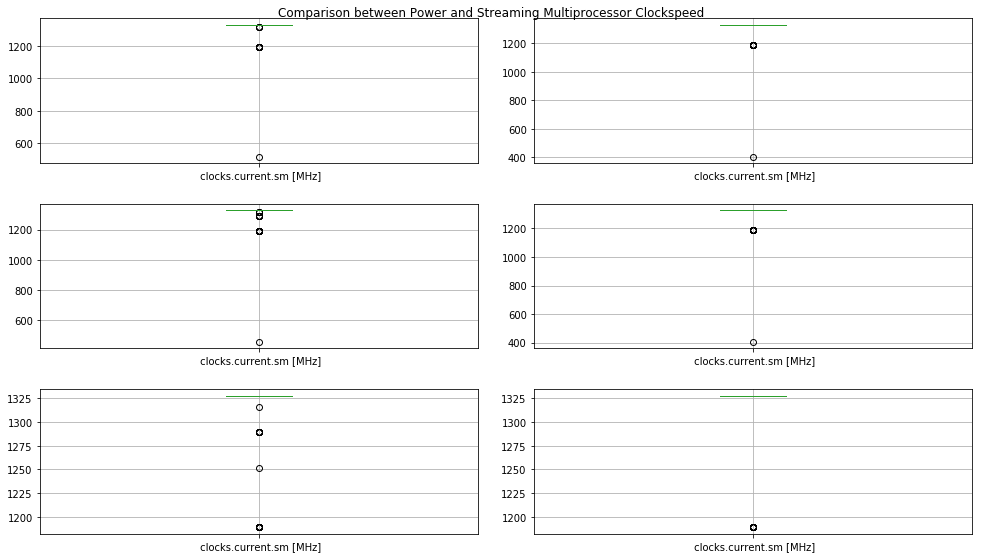

In [52]:

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(14, 8))
fig.suptitle("Comparison between Power and Streaming Multiprocessor Clockspeed")

avod_urban.boxplot(' clocks.current.sm [MHz]',ax=axes[0,0])
vox_urban.boxplot(' clocks.current.sm [MHz]',ax=axes[0,1])

avod_nurban.boxplot(' clocks.current.sm [MHz]',ax=axes[1,0])
vox_nurban.boxplot(' clocks.current.sm [MHz]',ax=axes[1,1])

avod_baseline.boxplot(' clocks.current.sm [MHz]',ax=axes[2,0])
vox_baseline.boxplot(' clocks.current.sm [MHz]',ax=axes[2,1])
fig.tight_layout(pad=2)


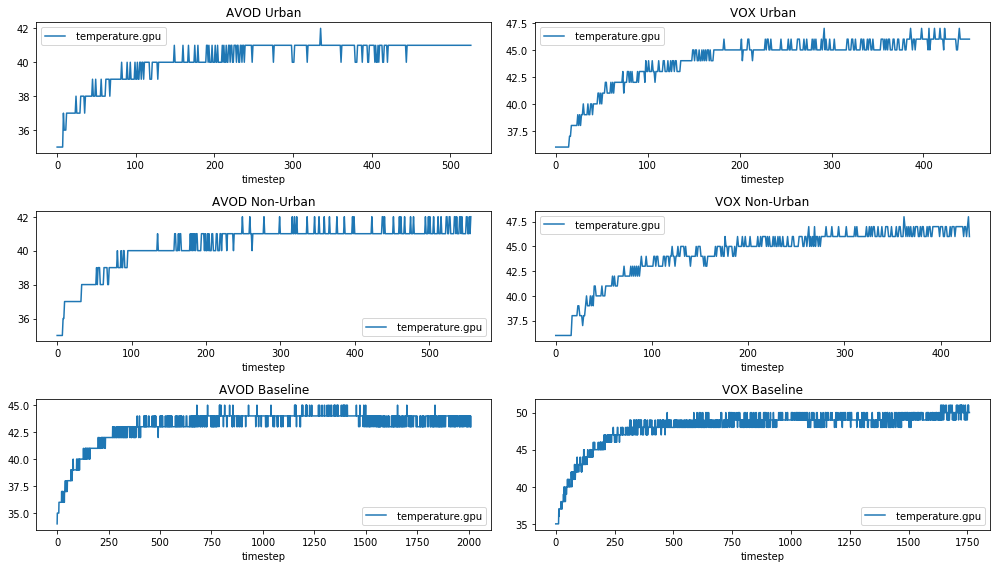

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(14, 8))

avod_urban.plot(x = 'timestep',y =' temperature.gpu',kind='line',ax=axes[0,0], title='AVOD Urban')
vox_urban.plot(x = 'timestep',y =' temperature.gpu',kind='line',ax=axes[0,1],title='VOX Urban')


avod_nurban.plot(x = 'timestep', y =' temperature.gpu',kind='line',ax=axes[1,0], title='AVOD Non-Urban')
vox_nurban.plot( x = 'timestep',y =' temperature.gpu',kind='line',ax=axes[1,1],title='VOX Non-Urban')

avod_baseline.plot(x = 'timestep',y =' temperature.gpu',kind='line',ax=axes[2,0], title='AVOD Baseline')
vox_baseline.plot(x = 'timestep',y =' temperature.gpu',kind='line',ax=axes[2,1],title='VOX Baseline')

fig.tight_layout()
# fig, ax1 = plt.subplots(figsize=(10, 6))
# plt.violinplot([avod_urban[' temperature.gpu'],vox_urban[' temperature.gpu']],showmeans=True  )
# plt.figure()
# plt.violinplot([avod_nurban[' temperature.gpu'],vox_nurban[' temperature.gpu']],showmeans=True )

# plt.figure()
# plt.boxplot([urban_df[' power.draw [W]'],nurban_df[' power.draw [W]']])

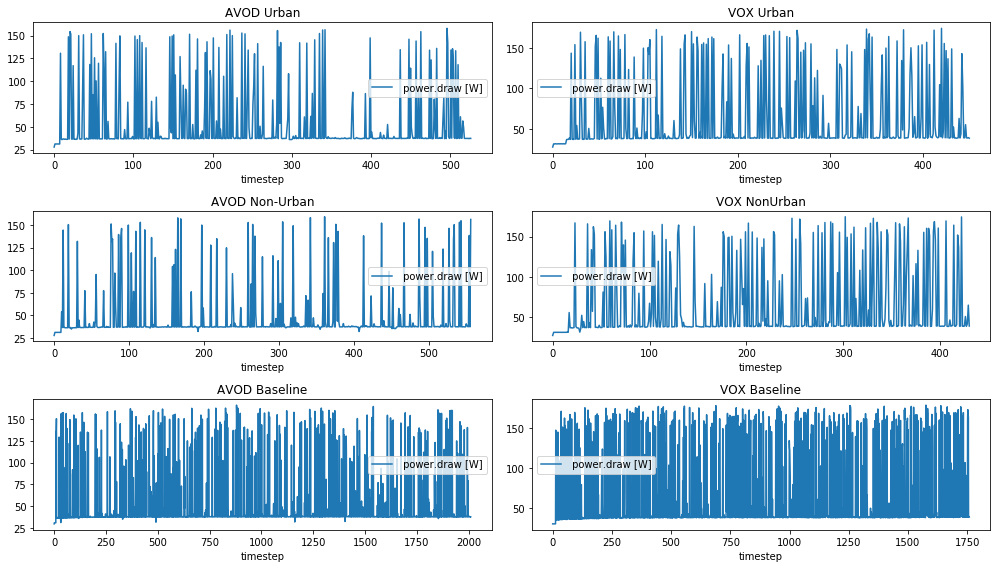

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(14, 8))

avod_urban.plot(x = 'timestep',y =' power.draw [W]',kind='line',ax=axes[0,0], title='AVOD Urban')
vox_urban.plot(x = 'timestep',y =' power.draw [W]',kind='line',ax=axes[0,1],title='VOX Urban')


avod_nurban.plot(x = 'timestep', y =' power.draw [W]',kind='line',ax=axes[1,0], title='AVOD Non-Urban')
vox_nurban.plot( x = 'timestep',y =' power.draw [W]',kind='line',ax=axes[1,1],title='VOX NonUrban')

avod_baseline.plot(x = 'timestep',y =' power.draw [W]',kind='line',ax=axes[2,0], title='AVOD Baseline')
vox_baseline.plot(x = 'timestep',y =' power.draw [W]',kind='line',ax=axes[2,1],title='VOX Baseline')

fig.tight_layout()

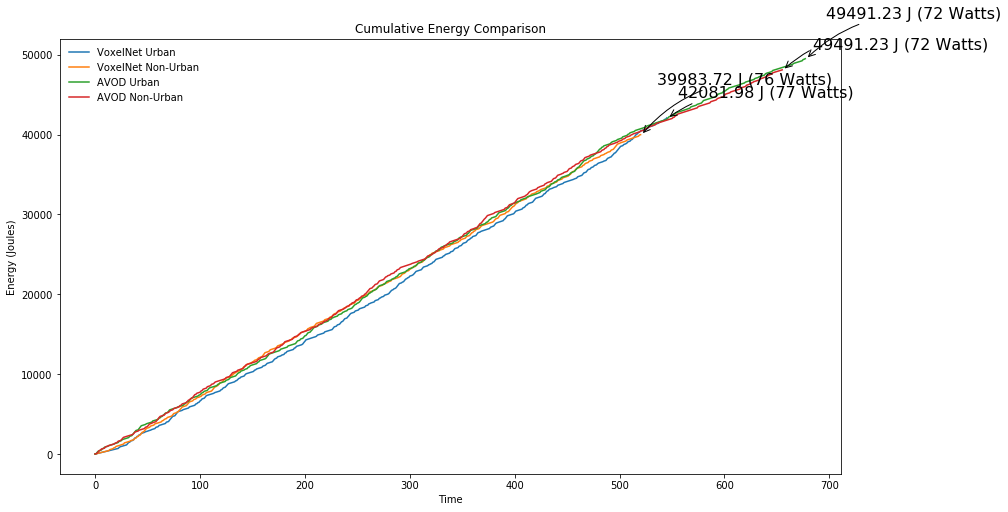

In [40]:
plt.figure(2,figsize=(14,8))
vu = vox_urban[' power.draw [W]'].cumsum()
a = vu.shape[0]
am = "{0:.2f}".format(vu.max())
aml = vu.max()


vnu = vox_nurban[' power.draw [W]'].cumsum()
b = vnu.shape[0]
aml = vu.max()
bm = "{0:.2f}".format(vnu.max())
bml = vnu.max()

avu= avod_urban[' power.draw [W]'].cumsum()
c = avu.shape[0]
aml = vu.max()
cm = "{0:.2f}".format(avu.max())
cml = avu.max()

avnu = avod_nurban[' power.draw [W]'].cumsum()
d = avnu.shape[0]
dm = "{0:.2f}".format(avnu.max())
dml = avnu.max()

plt.plot(vu,label='VoxelNet Urban')
plt.annotate(f'{am} J ({int(float(am)/a)} Watts)',
             xy=(a, aml), xycoords='data',
             xytext=(+10, +20), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot(vnu,label='VoxelNet Non-Urban')
plt.annotate(f'{bm} J ({int(float(bm)/b)} Watts)',
             xy=(b, bml), xycoords='data',
             xytext=(+15, +50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot(avu,label='AVOD Urban')
plt.annotate(f'{cm} J ({int(float(cm)/c)} Watts)',
             xy=(c, cml), xycoords='data',
             xytext=(+20, +40), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot(avnu,label='AVOD Non-Urban')
plt.annotate(f'{cm} J ({int(float(cm)/c)} Watts)',
             xy=(d, dml), xycoords='data',
             xytext=(+30, +20), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.3"))



plt.legend(loc='upper left', frameon=False)
plt.ylabel('Energy (Joules)')
plt.xlabel('Time')
plt.title("Cumulative Energy Comparison")
plt.savefig('energycomp.png',dpi=300)

In [188]:
vu.max()

28632.279999999977

In [18]:
avod_urban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB]
count,678.0,678.000000,678.000000,678.000000,678.000000,678.000000
mean,0.0,72.995914,28.147493,1327.738938,50.075221,14762.815634
std,0.0,49.061166,26.943325,5.532073,3.573488,597.486486
min,0.0,34.830000,0.000000,1189.000000,38.000000,9225.000000
25%,0.0,41.620000,0.000000,1328.000000,48.000000,14832.000000
50%,0.0,42.830000,26.000000,1328.000000,51.000000,14832.000000
75%,0.0,114.040000,44.000000,1328.000000,53.000000,14832.000000
max,0.0,182.890000,100.000000,1328.000000,55.000000,14832.000000


In [19]:
vox_urban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB]
count,546.0,546.000000,546.000000,546.000000,546.000000,546.000000
mean,0.0,77.073223,30.221612,1322.144689,49.369963,14031.075092
std,0.0,51.719289,28.648973,27.946987,5.126164,2977.285070
min,0.0,30.930000,0.000000,1189.000000,35.000000,0.000000
25%,0.0,41.620000,0.000000,1328.000000,47.000000,14832.000000
50%,0.0,43.080000,29.000000,1328.000000,51.000000,14832.000000
75%,0.0,137.697500,54.000000,1328.000000,53.000000,14832.000000
max,0.0,182.890000,100.000000,1328.000000,55.000000,14832.000000


In [20]:
avod_nurban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB]
count,599.0,599.000000,599.000000,599.0,599.000000,599.000000
mean,0.0,75.985526,29.285476,1328.0,51.323873,14241.497496
std,0.0,49.217653,27.420246,0.0,4.124154,603.666459
min,0.0,37.730000,0.000000,1328.0,38.000000,9217.000000
25%,0.0,42.110000,0.000000,1328.0,50.000000,14320.000000
50%,0.0,43.810000,26.000000,1328.0,52.000000,14320.000000
75%,0.0,120.675000,49.000000,1328.0,55.000000,14320.000000
max,0.0,185.330000,100.000000,1328.0,57.000000,14320.000000


In [162]:
vox_nurban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB],timestep
count,430.0,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,1.0,65.456116,24.995349,1320.358140,44.269767,8864.058140,214.932558
std,0.0,46.638964,24.510404,51.893625,2.774638,1706.976102,124.700453
min,1.0,27.290000,0.000000,405.000000,36.000000,0.000000,0.000000
25%,1.0,38.260000,0.000000,1328.000000,43.000000,9209.000000,107.250000
50%,1.0,38.750000,20.500000,1328.000000,45.000000,9209.000000,214.500000
75%,1.0,73.727500,50.000000,1328.000000,46.000000,9209.000000,322.750000
max,1.0,174.690000,70.000000,1328.000000,48.000000,9209.000000,430.000000


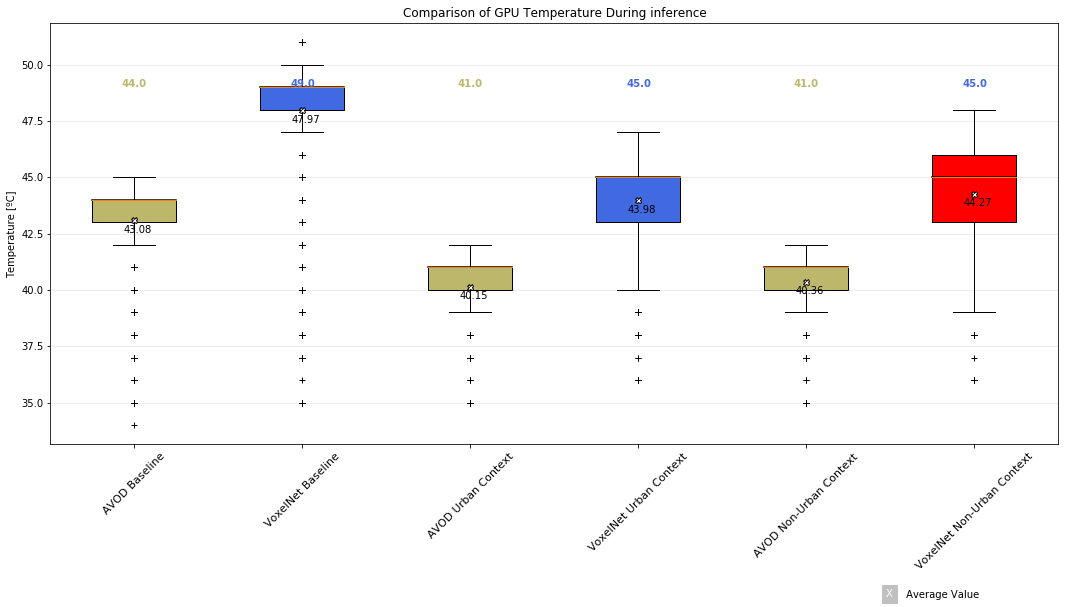

In [9]:

data = [avod_baseline[' temperature.gpu'],vox_baseline[' temperature.gpu'],avod_urban[' temperature.gpu'],vox_urban[' temperature.gpu'],avod_nurban[' temperature.gpu'],vox_nurban[' temperature.gpu']]
dists = ['AVOD Baseline', 'VoxelNet Baseline','AVOD Urban Context','VoxelNet Urban Context','AVOD Non-Urban Context','VoxelNet Non-Urban Context']
fig, ax1 = plt.subplots(figsize=(16, 9))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
numDists = 3
bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of GPU Temperature During inference')
ax1.set_ylabel('Temperature [ºC]')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = numDists*2
medians = list(range(numBoxes))
for i in range(numBoxes-1):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
             color='w', marker='X', markeredgecolor='k')
    x1 =[np.average(med.get_xdata())] 
    y1 =[np.average(data[i])]
    for a,b in zip(x1, y1): 
        st = "{0:.2f}".format(b)
        plt.text(a-0.0655, b-0.55, st)
#     pyplot.show()
i = numBoxes-1
box = bp['boxes'][i]
boxX = []
boxY = []
for j in range(5):
    boxX.append(box.get_xdata()[j])
    boxY.append(box.get_ydata()[j])
boxCoords = list(zip(boxX, boxY))
# Alternate between Dark Khaki and Royal Blue
k = i % 2
boxPolygon = Polygon(boxCoords, facecolor='red')
ax1.add_patch(boxPolygon)
# Now draw the median lines back over what we just filled in
med = bp['medians'][i]
medianX = []
medianY = []
for j in range(2):
    medianX.append(med.get_xdata()[j])
    medianY.append(med.get_ydata()[j])
    plt.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
# Finally, overplot the sample averages, with horizontal alignment
# in the center of each box
plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
         color='w', marker='X', markeredgecolor='k')
x1 =[np.average(med.get_xdata())] 
y1 =[np.average(data[i])]
for a,b in zip(x1, y1): 
    st = "{0:.2f}".format(b)
    plt.text(a-0.0655, b-0.55, st)
    
# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
xtickNames = plt.setp(ax1, xticklabels=dists)
plt.setp(xtickNames, rotation=45, fontsize=11)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
lowerLabels= [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
top=49
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.00001), upperLabels[tick],
             horizontalalignment='center', 
             size='medium', weight=weights[k],
             color=boxColors[k])


# Finally, add a basic legend
# plt.figtext(0.80, 0.08, str(N) + ' Random Numbers',
#             backgroundcolor=boxColors[0], color='black', weight='roman',
#             size='x-small')

plt.figtext(0.80, 0.015, 'X', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
            size='medium')
plt.savefig('gputepbox.png',dpi=300)
plt.show()

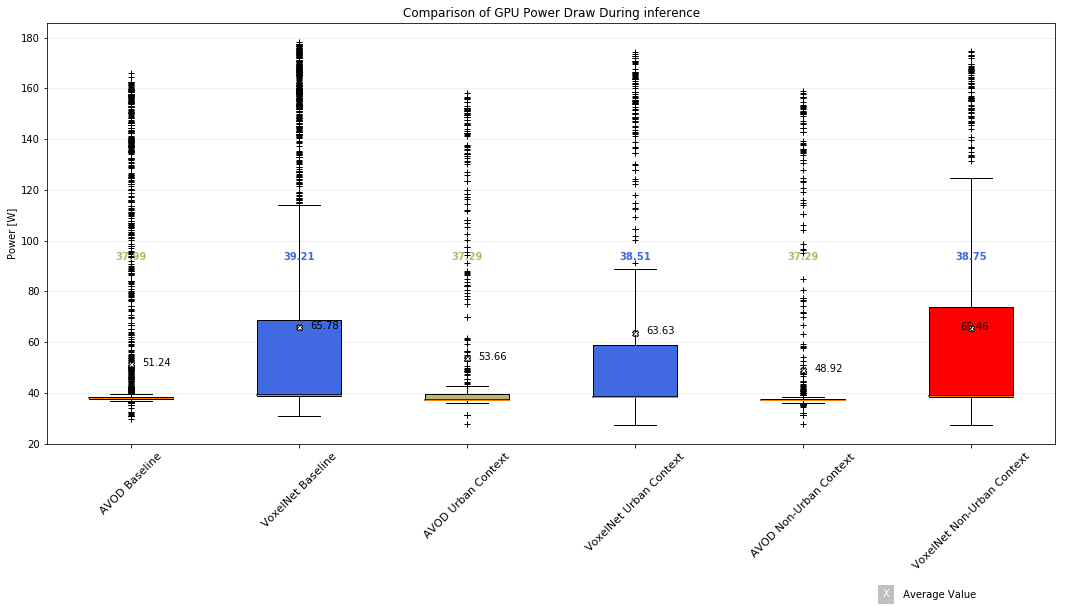

In [10]:
data = [avod_baseline[' power.draw [W]'],vox_baseline[' power.draw [W]'],avod_urban[' power.draw [W]'],vox_urban[' power.draw [W]'],avod_nurban[' power.draw [W]'],vox_nurban[' power.draw [W]']]
dists = ['AVOD Baseline', 'VoxelNet Baseline','AVOD Urban Context','VoxelNet Urban Context','AVOD Non-Urban Context','VoxelNet Non-Urban Context']
fig, ax1 = plt.subplots(figsize=(16, 9))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
numDists = 3
bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of GPU Power Draw During inference')
ax1.set_ylabel('Power [W]')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = numDists*2
medians = list(range(numBoxes))
for i in range(numBoxes-1):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
             color='w', marker='X', markeredgecolor='k')
    x1 =[np.average(med.get_xdata())] 
    y1 =[np.average(data[i])]
    for a,b in zip(x1, y1): 
        st = "{0:.2f}".format(b)
        plt.text(a+0.0655, b-0.55, st)
i = numBoxes-1
box = bp['boxes'][i]
boxX = []
boxY = []
for j in range(5):
    boxX.append(box.get_xdata()[j])
    boxY.append(box.get_ydata()[j])
boxCoords = list(zip(boxX, boxY))
# Alternate between Dark Khaki and Royal Blue
k = i % 2
boxPolygon = Polygon(boxCoords, facecolor='red')
ax1.add_patch(boxPolygon)
# Now draw the median lines back over what we just filled in
med = bp['medians'][i]
medianX = []
medianY = []
for j in range(2):
    medianX.append(med.get_xdata()[j])
    medianY.append(med.get_ydata()[j])
    plt.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
# Finally, overplot the sample averages, with horizontal alignment
# in the center of each box
plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
         color='w', marker='X', markeredgecolor='k')
x1 =[np.average(med.get_xdata())] 
y1 =[np.average(data[i])]
for a,b in zip(x1, y1): 
    st = "{0:.2f}".format(b)
    plt.text(a-0.0655, b-0.55, st)
# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
xtickNames = plt.setp(ax1, xticklabels=dists)
plt.setp(xtickNames, rotation=45, fontsize=11)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
top=185
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.5), upperLabels[tick],
             horizontalalignment='center', size='medium', weight=weights[k],
             color=boxColors[k])

# Finally, add a basic legend
# plt.figtext(0.80, 0.08, str(N) + ' Random Numbers',
#             backgroundcolor=boxColors[0], color='black', weight='roman',
#             size='x-small')

plt.figtext(0.80, 0.015, 'X', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
            size='medium')
plt.savefig('gpupowerbox.png',dpi=300)
plt.show()

In [12]:
joint_vox_urban = pd.read_csv('/mnt/storage/home/ja17618/voxtesturban.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
joint_vox_urban = df_preprocess(joint_vox_urban)
print(joint_vox_urban.shape)
joint_vox_nurban = pd.read_csv('/mnt/storage/home/ja17618/voxtestnon_urban.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
joint_vox_nurban = df_preprocess(joint_vox_nurban)
print(joint_vox_nurban.shape)

joint_avod_urban = pd.read_csv('/mnt/storage/home/ja17618/avodurban.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
joint_avod_urban = df_preprocess(joint_avod_urban)
print(joint_avod_urban.shape)

joint_avod_urban = pd.read_csv('/mnt/storage/home/ja17618/avodnon_urban.out',skiprows=0,dtype={' timestamp':str},parse_dates=[' timestamp'],date_parser=pd.to_datetime)
joint_avod_nurban = df_preprocess(joint_avod_urban)
print(joint_avod_nurban.shape)


(546, 8)
(475, 8)
(678, 8)
(599, 8)


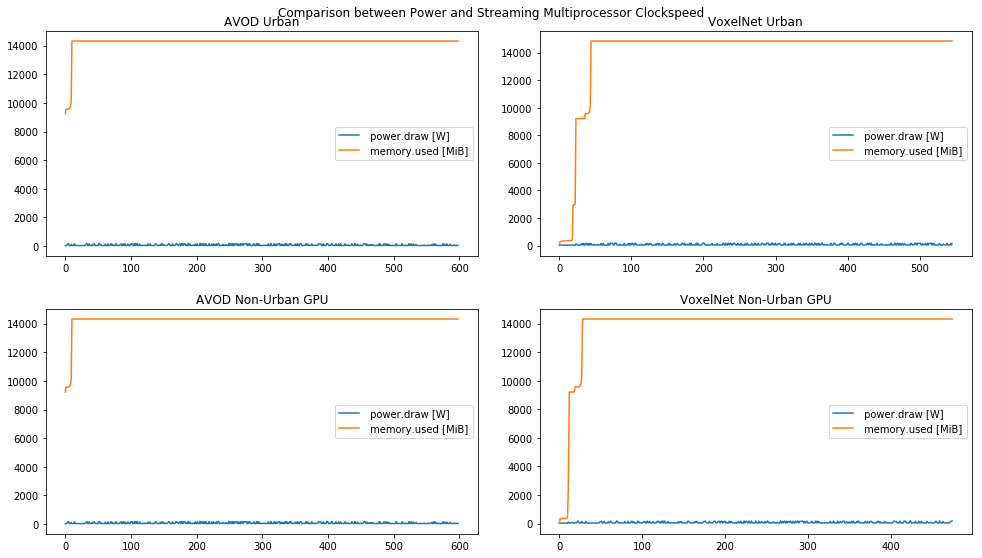

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14, 8))
fig.suptitle("Comparison between Power and Streaming Multiprocessor Clockspeed")

joint_avod_urban.plot(y =[' power.draw [W]',' memory.used [MiB]'],ax=axes[0,0],title='AVOD Urban')
joint_vox_urban.plot(y =[' power.draw [W]',' memory.used [MiB]'],ax=axes[0,1],title='VoxelNet Urban')

joint_avod_nurban.plot(y =[' power.draw [W]',' memory.used [MiB]'],ax=axes[1,0],title='AVOD Non-Urban GPU')
joint_vox_nurban.plot(y =[' power.draw [W]',' memory.used [MiB]'],ax=axes[1,1],title='VoxelNet Non-Urban GPU')
fig.tight_layout(pad=2)


In [15]:

joint_urban_non_urban = pd.concat((joint_avod_urban.drop(' timestamp',axis=1), joint_vox_nurban.drop(' timestamp',axis=1)))
joint_urban_non_urban = joint_urban_non_urban.groupby(joint_urban_non_urban.index).mean()
# joint_nurban = pd.concat((joint_avod_nurban.drop(' timestamp',axis=1), joint_vox_nurban.drop(' timestamp',axis=1)))
# joint_nurban_urban = joint_nurban.groupby(joint_nurban.index).mean()


/mnt/storage/home/ja17618/.conda/envs/vox/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [75]:
plt.figure(2,figsize=(14,8))
vu = joint_urban[' power.draw [W]'].cumsum()
a = vu.shape[0]
am = "{0:.2f}".format(vu.max())
aml = vu.max()


vnu = joint_nurban[' power.draw [W]'].cumsum()
b = vnu.shape[0]
aml = vu.max()
bm = "{0:.2f}".format(vnu.max())
bml = vnu.max()

# avu= joint_avod_urban[' power.draw [W]'].cumsum()
# c = avu.shape[0]
# aml = vu.max()
# cm = "{0:.2f}".format(avu.max())
# cml = avu.max()

# avnu = joint_avod_nurban[' power.draw [W]'].cumsum()
# d = avnu.shape[0]
# dm = "{0:.2f}".format(avnu.max())
# dml = avnu.max()

plt.plot(vu,label='VoxelNet+AVOD Urban')
plt.annotate(str(am)+'J',
             xy=(a, aml), xycoords='data',
             xytext=(+10, +20), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot(vnu,label='VoxelNet+AVOD Non-Urban')
plt.annotate(str(bm)+'J',
             xy=(b, bml), xycoords='data',
             xytext=(+15, +80), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# plt.plot(avu,label='AVOD Urban')
# plt.annotate(str(cm)+'J',
#              xy=(c, cml), xycoords='data',
#              xytext=(+20, +40), textcoords='offset points', fontsize=16,
#              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# plt.plot(avnu,label='AVOD Non-Urban')
# plt.annotate(str(dm)+'J',
#              xy=(d, dml), xycoords='data',
#              xytext=(+30, +20), textcoords='offset points', fontsize=16,
#              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.3"))



plt.legend(loc='upper left', frameon=False)
plt.ylabel('Energy (Joules)')
plt.xlabel('Time')
plt.title("Cumulative Energy Comparison")
# plt.savefig('energycomp.png',dpi=300)

NameError: name 'joint_nurban' is not defined

<Figure size 1008x576 with 0 Axes>

[(0.925, 49.5), (1.075, 49.5), (1.075, 54.5), (0.925, 54.5), (0.925, 49.5)]
[0.925 1.075]
52.0


Text(0.815,0.013,' Average Value')

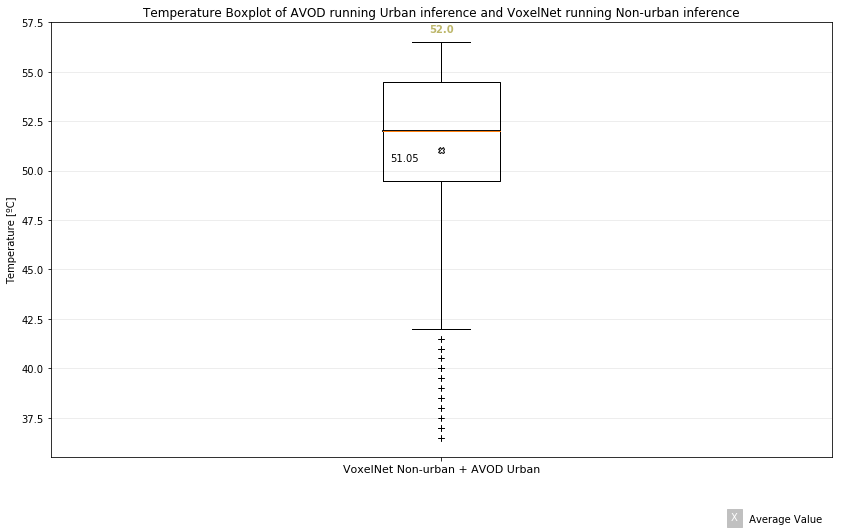

In [163]:
data =  joint_urban_non_urban[' temperature.gpu']
dists = ['VoxelNet Non-urban + AVOD Urban']
fig, ax1 = plt.subplots(figsize=(14, 8))
bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5 )
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)



ax1.set_axisbelow(True)
ax1.set_title('Temperature Boxplot of AVOD running Urban inference and VoxelNet running Non-urban inference')
ax1.set_ylabel('Temperature [ºC]')


box = bp['boxes']
boxX = []
boxY = []
for j in range(5):
    boxX.append(box[0].get_xdata()[j])
    boxY.append(box[0].get_ydata()[j])
boxCoords = list(zip(boxX, boxY))
print(boxCoords)
k = 0
# boxPolygon = Polygon(boxCoords, facecolor=boxColors[0])
# ax1.add_patch(boxPolygon)
# Now draw the median lines back over what we just filled in
medians = list(range(1))

med = bp['medians'][i]
print(med.get_xdata())
medianX = []
medianY = []
for j in range(2):
    medianX.append(med.get_xdata()[j])
    medianY.append(med.get_ydata()[j])
    plt.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    
x1 =[np.average(med.get_xdata())] 
y1 =[np.average(data)]
for a,b in zip(x1, y1): 
    st = "{0:.2f}".format(b)
    plt.text(a-0.0655, b-0.55, st)

plt.plot(med.get_xdata(), med.get_ydata(), 'k')
# Finally, overplot the sample averages, with horizontal alignment
# in the center of each box
plt.plot([np.average(med.get_xdata())], [np.average(data)],
         color='w', marker='X', markeredgecolor='k')


ax1.set_xlim(0.5, 1 + 0.5)
xtickNames = plt.setp(ax1, xticklabels=dists)
plt.setp(xtickNames, rotation=0, fontsize=11)

upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
top=60
print(medianY[0])
ax1.text(1, top - (top*0.05), upperLabels[0],
         horizontalalignment='center', 
         size='medium', weight=weights[0],
         color=boxColors[0])


plt.figtext(0.80, 0.015, 'X', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
            size='medium')



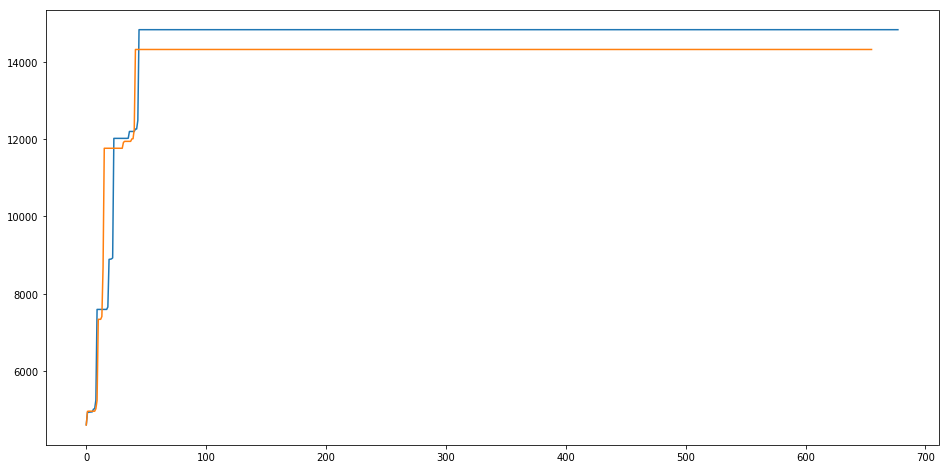

In [36]:
plt.figure(3,figsize=(16,8))
joint_urban[' memory.used [MiB]'].plot()
joint_nurban[' memory.used [MiB]'].plot()

[(0.925, 42.715), (1.075, 42.715), (1.075, 103.48749999999998), (0.925, 103.48749999999998), (0.925, 42.715)]
[0.925 1.075]
56.504999999999995


Text(0.815,0.013,' Average Value')

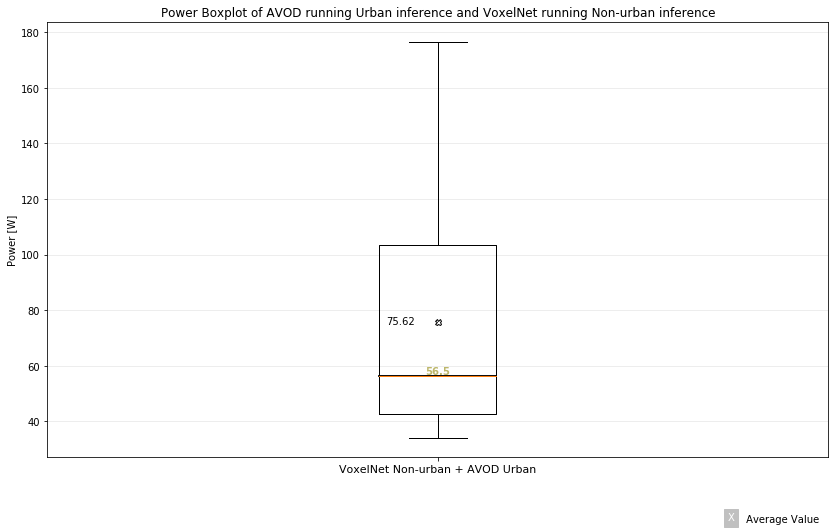

In [162]:
data =  joint_urban_non_urban[' power.draw [W]']
dists = ['VoxelNet Non-urban + AVOD Urban']
fig, ax1 = plt.subplots(figsize=(14, 8))
bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5 )
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)



ax1.set_axisbelow(True)
ax1.set_title('Power Boxplot of AVOD running Urban inference and VoxelNet running Non-urban inference')
ax1.set_ylabel('Power [W]')


box = bp['boxes']
boxX = []
boxY = []
for j in range(5):
    boxX.append(box[0].get_xdata()[j])
    boxY.append(box[0].get_ydata()[j])
boxCoords = list(zip(boxX, boxY))
print(boxCoords)
k = 0
# boxPolygon = Polygon(boxCoords, facecolor=boxColors[0])
# ax1.add_patch(boxPolygon)
# Now draw the median lines back over what we just filled in
medians = list(range(1))

med = bp['medians'][i]
print(med.get_xdata())
medianX = []
medianY = []
for j in range(2):
    medianX.append(med.get_xdata()[j])
    medianY.append(med.get_ydata()[j])
    plt.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    
x1 =[np.average(med.get_xdata())] 
y1 =[np.average(data)]
for a,b in zip(x1, y1): 
    st = "{0:.2f}".format(b)
    plt.text(a-0.0655, b-0.55, st)

plt.plot(med.get_xdata(), med.get_ydata(), 'k')
# Finally, overplot the sample averages, with horizontal alignment
# in the center of each box
plt.plot([np.average(med.get_xdata())], [np.average(data)],
         color='w', marker='X', markeredgecolor='k')


ax1.set_xlim(0.5, 1 + 0.5)
xtickNames = plt.setp(ax1, xticklabels=dists)
plt.setp(xtickNames, rotation=0, fontsize=11)

upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
top=60
print(medianY[0])
ax1.text(1, top - (top*0.05), upperLabels[0],
         horizontalalignment='center', 
         size='medium', weight=weights[0],
         color=boxColors[0])


plt.figtext(0.80, 0.015, 'X', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
            size='medium')



In [189]:
avod_baseline.describe()


,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB],timestep
count,2002.0,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,0.0,51.242268,11.909091,1326.712288,43.083417,5601.595904,1004.752747
std,0.0,32.660495,16.372712,12.682339,1.630400,348.754768,580.709834
min,0.0,29.730000,0.000000,1189.000000,34.000000,0.000000,0.000000
25%,0.0,37.750000,0.000000,1328.000000,43.000000,5625.000000,502.250000
50%,0.0,37.990000,0.000000,1328.000000,44.000000,5625.000000,1004.500000
75%,0.0,38.480000,27.000000,1328.000000,44.000000,5625.000000,1506.750000
max,0.0,165.860000,100.000000,1328.000000,45.000000,5625.000000,2010.000000


In [190]:
vox_baseline.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB],timestep
count,1754.0,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000
mean,0.0,65.780513,21.291904,1326.969783,47.967503,14765.521665,879.433865
std,0.0,46.976752,24.145128,11.925596,2.590204,751.252236,508.429295
min,0.0,30.930000,0.000000,1189.000000,35.000000,5625.000000,0.000000
25%,0.0,38.720000,0.000000,1328.000000,48.000000,14832.000000,439.250000
50%,0.0,39.210000,10.000000,1328.000000,49.000000,14832.000000,879.500000
75%,0.0,68.790000,42.000000,1328.000000,49.000000,14832.000000,1319.750000
max,0.0,178.170000,100.000000,1328.000000,51.000000,14832.000000,1759.000000


In [31]:
joint_nurban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB],timestep
count,599.0,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,0.0,75.621920,29.138564,1326.607679,51.050083,14078.132721,299.943239
std,0.0,38.474241,20.491841,9.746091,4.464276,1301.750300,173.817289
min,0.0,34.210000,0.000000,1258.500000,36.500000,4608.500000,0.000000
25%,0.0,42.715000,13.000000,1328.000000,49.500000,14320.000000,149.500000
50%,0.0,56.505000,29.000000,1328.000000,52.000000,14320.000000,300.000000
75%,0.0,103.487500,41.750000,1328.000000,54.500000,14320.000000,450.500000
max,0.0,176.435000,93.000000,1328.000000,56.500000,14320.000000,600.000000


In [30]:
joint_urban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB],timestep
count,678.0,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,0.0,73.125819,27.950590,1325.381268,49.666667,14474.911504,339.583333
std,0.0,37.391388,19.642488,13.707818,4.068227,1542.715123,196.721175
min,0.0,34.205000,0.000000,1189.000000,36.500000,4612.500000,0.000000
25%,0.0,41.620000,10.625000,1328.000000,48.000000,14832.000000,169.250000
50%,0.0,51.157500,29.500000,1328.000000,50.500000,14832.000000,339.500000
75%,0.0,101.385000,41.000000,1328.000000,53.000000,14832.000000,509.750000
max,0.0,175.100000,87.000000,1328.000000,55.000000,14832.000000,680.000000


In [18]:
avod_nurban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB]
count,599.0,599.000000,599.000000,599.0,599.000000,599.000000
mean,0.0,75.985526,29.285476,1328.0,51.323873,14241.497496
std,0.0,49.217653,27.420246,0.0,4.124154,603.666459
min,0.0,37.730000,0.000000,1328.0,38.000000,9217.000000
25%,0.0,42.110000,0.000000,1328.0,50.000000,14320.000000
50%,0.0,43.810000,26.000000,1328.0,52.000000,14320.000000
75%,0.0,120.675000,49.000000,1328.0,55.000000,14320.000000
max,0.0,185.330000,100.000000,1328.0,57.000000,14320.000000


In [19]:
avod_urban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB]
count,678.0,678.000000,678.000000,678.000000,678.000000,678.000000
mean,0.0,72.995914,28.147493,1327.738938,50.075221,14762.815634
std,0.0,49.061166,26.943325,5.532073,3.573488,597.486486
min,0.0,34.830000,0.000000,1189.000000,38.000000,9225.000000
25%,0.0,41.620000,0.000000,1328.000000,48.000000,14832.000000
50%,0.0,42.830000,26.000000,1328.000000,51.000000,14832.000000
75%,0.0,114.040000,44.000000,1328.000000,53.000000,14832.000000
max,0.0,182.890000,100.000000,1328.000000,55.000000,14832.000000


In [20]:
vox_nurban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB]
count,475.0,475.000000,475.000000,475.000000,475.000000,475.000000
mean,0.0,78.547326,32.707368,1324.488421,50.705263,13808.981053
std,0.0,51.154103,28.897766,21.835339,5.394312,2310.883222
min,0.0,30.690000,0.000000,1189.000000,35.000000,0.000000
25%,0.0,42.470000,0.000000,1328.000000,48.000000,14320.000000
50%,0.0,44.050000,32.000000,1328.000000,53.000000,14320.000000
75%,0.0,138.315000,58.500000,1328.000000,55.000000,14320.000000
max,0.0,185.330000,100.000000,1328.000000,57.000000,14320.000000


In [21]:
vox_urban.describe()

,index,power.draw [W],utilization.gpu [%],clocks.current.sm [MHz],temperature.gpu,memory.used [MiB]
count,546.0,546.000000,546.000000,546.000000,546.000000,546.000000
mean,0.0,77.073223,30.221612,1322.144689,49.369963,14031.075092
std,0.0,51.719289,28.648973,27.946987,5.126164,2977.285070
min,0.0,30.930000,0.000000,1189.000000,35.000000,0.000000
25%,0.0,41.620000,0.000000,1328.000000,47.000000,14832.000000
50%,0.0,43.080000,29.000000,1328.000000,51.000000,14832.000000
75%,0.0,137.697500,54.000000,1328.000000,53.000000,14832.000000
max,0.0,182.890000,100.000000,1328.000000,55.000000,14832.000000


In [188]:
joint_urban_non_urban.describe()

,clocks.current.sm [MHz],memory.used [MiB],power.draw [W],temperature.gpu,utilization.gpu [%],index,timestep
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.0,475.000000
mean,1326.607679,14078.132721,75.621920,51.050083,29.138564,0.0,237.671579
std,9.746091,1301.750300,38.474241,4.464276,20.491841,0.0,137.867627
min,1258.500000,4608.500000,34.210000,36.500000,0.000000,0.0,0.000000
25%,1328.000000,14320.000000,42.715000,49.500000,13.000000,0.0,118.500000
50%,1328.000000,14320.000000,56.505000,52.000000,29.000000,0.0,238.000000
75%,1328.000000,14320.000000,103.487500,54.500000,41.750000,0.0,356.500000
max,1328.000000,14320.000000,176.435000,56.500000,93.000000,0.0,476.000000


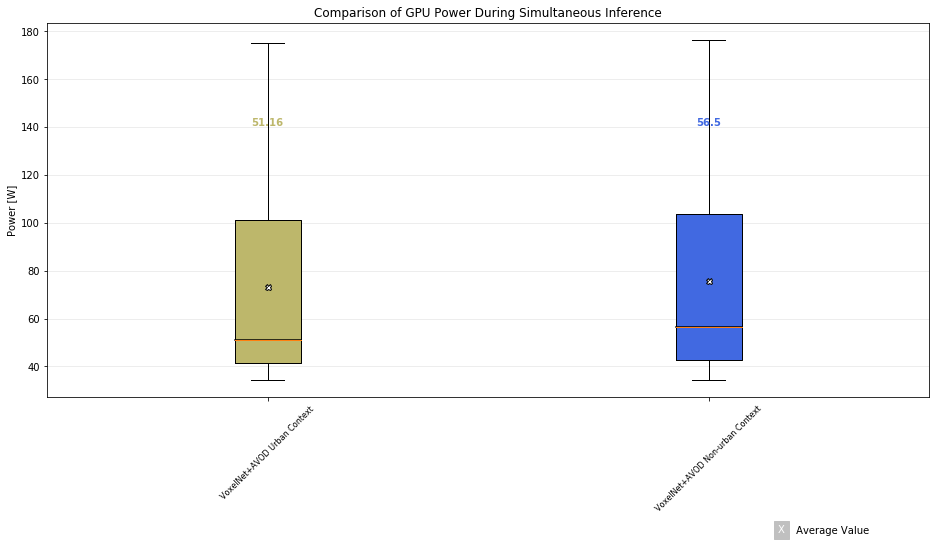

In [34]:
data = [joint_urban[' power.draw [W]'],joint_nurban[' power.draw [W]']]
dists = ['VoxelNet+AVOD Urban Context', 'VoxelNet+AVOD Non-urban Context']
fig, ax1 = plt.subplots(figsize=(14, 8))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
numDists = 1
bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of GPU Power During Simultaneous Inference')
ax1.set_ylabel('Power [W]')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = numDists*2
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.mean(med.get_xdata())], [np.mean(data[i])],
             color='w', marker='X', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
xtickNames = plt.setp(ax1, xticklabels=dists)
plt.setp(xtickNames, rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
top=148
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', 
             size='medium', weight=weights[k],
             color=boxColors[k])


# Finally, add a basic legend
# plt.figtext(0.80, 0.08, str(N) + ' Random Numbers',
#             backgroundcolor=boxColors[0], color='black', weight='roman',
#             size='x-small')

plt.figtext(0.80, 0.015, 'X', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
            size='medium')
plt.savefig('jointpowerbox.png',dpi=300)
plt.show()

In [36]:
mp = np.mean([avod_urban[' power.draw [W]'].mean(),vox_urban[' power.draw [W]'].mean(),avod_nurban[' power.draw [W]'].mean(),vox_nurban[' power.draw [W]'].mean()])
jmp = np.mean([joint_urban[' power.draw [W]'].mean(),joint_nurban[' power.draw [W]'].mean()])


print(mp,jmp)



mp = np.mean([avod_urban[' temperature.gpu'].mean(),vox_urban[' temperature.gpu'].mean(),avod_nurban[' temperature.gpu'].mean(),vox_nurban[' temperature.gpu'].mean()])
jmp = np.mean([joint_urban[' temperature.gpu'].mean(),joint_nurban[' temperature.gpu'].mean()])
print(mp,jmp)




76.15049752243775 74.37386922525744
50.368580222166486 50.35837506956038


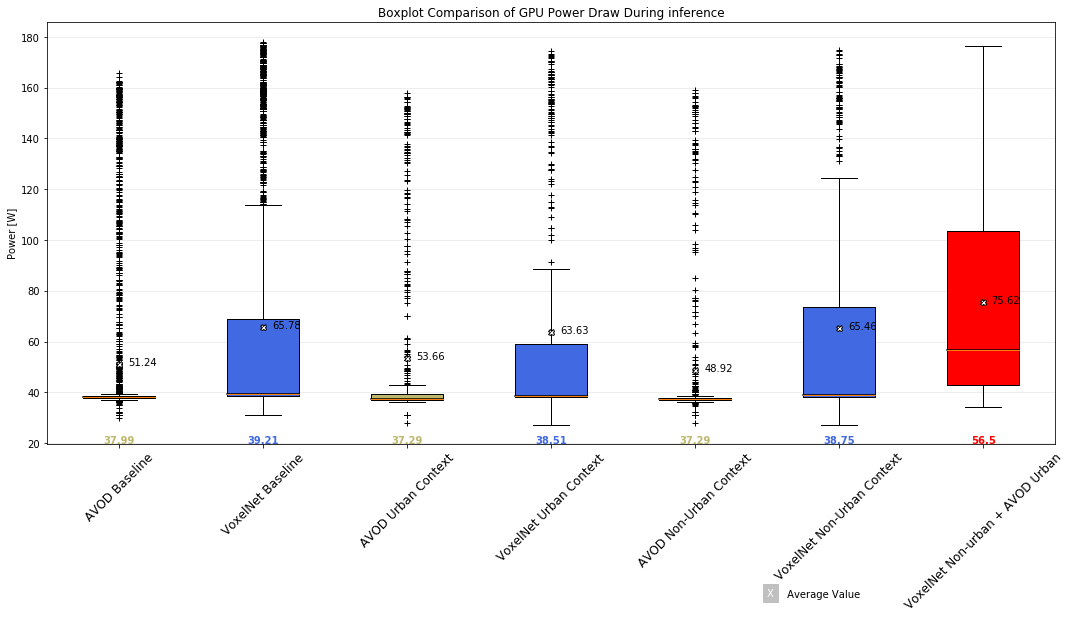

In [41]:
data = [avod_baseline[' power.draw [W]'],vox_baseline[' power.draw [W]'],avod_urban[' power.draw [W]'],vox_urban[' power.draw [W]'],avod_nurban[' power.draw [W]'],vox_nurban[' power.draw [W]'],joint_urban_non_urban[' power.draw [W]']]
dists = ['AVOD Baseline', 'VoxelNet Baseline','AVOD Urban Context','VoxelNet Urban Context','AVOD Non-Urban Context','VoxelNet Non-Urban Context','VoxelNet Non-urban + AVOD Urban']
fig, ax1 = plt.subplots(figsize=(16, 9))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
numDists = 4
bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Boxplot Comparison of GPU Power Draw During inference')
ax1.set_ylabel('Power [W]')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = numDists*2
medians = list(range(numBoxes))
try:
    for i in range(numBoxes-2):
        box = bp['boxes'][i]
        boxX = []
        boxY = []
        for j in range(5):
            boxX.append(box.get_xdata()[j])
            boxY.append(box.get_ydata()[j])
        boxCoords = list(zip(boxX, boxY))
        # Alternate between Dark Khaki and Royal Blue
        k = i % 2
        boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
        ax1.add_patch(boxPolygon)
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        medianX = []
        medianY = []
        for j in range(2):
            medianX.append(med.get_xdata()[j])
            medianY.append(med.get_ydata()[j])
            plt.plot(medianX, medianY, 'k')
            medians[i] = medianY[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
                 color='w', marker='X', markeredgecolor='k')
        x1 =[np.average(med.get_xdata())] 
        y1 =[np.average(data[i])]
        for a,b in zip(x1, y1): 
            st = "{0:.2f}".format(b)
            plt.text(a+0.0655, b-0.55, st)
except:
    pass
i = numBoxes-2
box = bp['boxes'][i]
boxX = []
boxY = []
for j in range(5):
    boxX.append(box.get_xdata()[j])
    boxY.append(box.get_ydata()[j])
boxCoords = list(zip(boxX, boxY))
# Alternate between Dark Khaki and Royal Blue
k = i % 2
boxPolygon = Polygon(boxCoords, facecolor='red')
ax1.add_patch(boxPolygon)
# Now draw the median lines back over what we just filled in
med = bp['medians'][i]
medianX = []
medianY = []
for j in range(2):
    medianX.append(med.get_xdata()[j])
    medianY.append(med.get_ydata()[j])
    plt.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
# Finally, overplot the sample averages, with horizontal alignment
# in the center of each box
plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
         color='w', marker='X', markeredgecolor='k')
x1 =[np.average(med.get_xdata())] 
y1 =[np.average(data[i])]
for a,b in zip(x1, y1): 
    st = "{0:.2f}".format(b)
    plt.text(a+0.055, b-0.55, st)
# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes-1 + 0.5)
xtickNames = plt.setp(ax1, xticklabels=dists)
plt.setp(xtickNames, rotation=45, fontsize=12)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
top=20
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    if tick != numBoxes-2:
        k = tick % 2
        ax1.text(pos[tick], top, upperLabels[tick],
                 horizontalalignment='center', 
                 size='medium', weight=weights[k],
                 color=boxColors[k])
    else:
        ax1.text(pos[tick], top - (top*0.0001), upperLabels[tick],
                 horizontalalignment='center', 
                 size='medium', weight=weights[k],
                 color='red')


# Finally, add a basic legend
# plt.figtext(0.80, 0.08, str(N) + ' Random Numbers',
#             backgroundcolor=boxColors[0], color='black', weight='roman',
#             size='x-small')

plt.figtext(0.70, 0.015, 'X', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.715, 0.013, ' Average Value', color='black', weight='roman',
            size='medium')
plt.savefig('gpupbox.png',dpi=300)
plt.show()

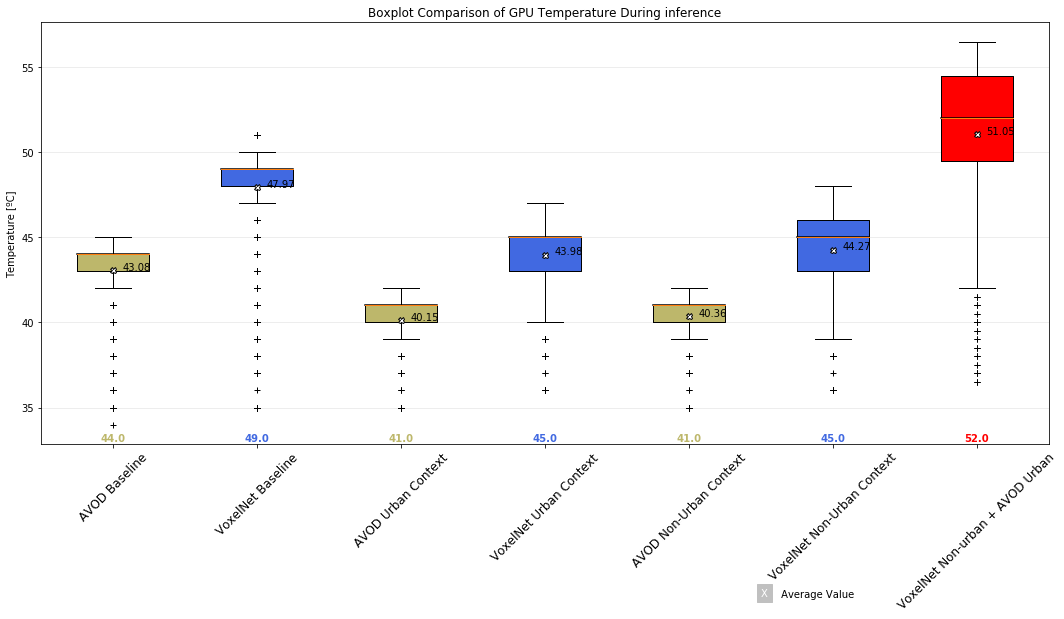

In [46]:

data = [avod_baseline[' temperature.gpu'],vox_baseline[' temperature.gpu'],avod_urban[' temperature.gpu'],vox_urban[' temperature.gpu'],avod_nurban[' temperature.gpu'],vox_nurban[' temperature.gpu'],joint_urban_non_urban[' temperature.gpu']]
dists = ['AVOD Baseline', 'VoxelNet Baseline','AVOD Urban Context','VoxelNet Urban Context','AVOD Non-Urban Context','VoxelNet Non-Urban Context','VoxelNet Non-urban + AVOD Urban']
fig, ax1 = plt.subplots(figsize=(16, 9))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
numDists = 4
bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Boxplot Comparison of GPU Temperature During inference')
ax1.set_ylabel('Temperature [ºC]')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = numDists*2
medians = list(range(numBoxes))
try:
    for i in range(numBoxes-2):
        box = bp['boxes'][i]
        boxX = []
        boxY = []
        for j in range(5):
            boxX.append(box.get_xdata()[j])
            boxY.append(box.get_ydata()[j])
        boxCoords = list(zip(boxX, boxY))
        # Alternate between Dark Khaki and Royal Blue
        k = i % 2
        boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
        ax1.add_patch(boxPolygon)
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        medianX = []
        medianY = []
        for j in range(2):
            medianX.append(med.get_xdata()[j])
            medianY.append(med.get_ydata()[j])
            plt.plot(medianX, medianY, 'k')
            medians[i] = medianY[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
                 color='w', marker='X', markeredgecolor='k')
        x1 =[np.average(med.get_xdata())] 
        y1 =[np.average(data[i])]
        for a,b in zip(x1, y1): 
            st = "{0:.2f}".format(b)
            plt.text(a+0.0655, b, st)
except:
    pass
i = numBoxes-2
box = bp['boxes'][i]
boxX = []
boxY = []
for j in range(5):
    boxX.append(box.get_xdata()[j])
    boxY.append(box.get_ydata()[j])
boxCoords = list(zip(boxX, boxY))
# Alternate between Dark Khaki and Royal Blue
k = i % 2
boxPolygon = Polygon(boxCoords, facecolor='red')
ax1.add_patch(boxPolygon)
# Now draw the median lines back over what we just filled in
med = bp['medians'][i]
medianX = []
medianY = []
for j in range(2):
    medianX.append(med.get_xdata()[j])
    medianY.append(med.get_ydata()[j])
    plt.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
# Finally, overplot the sample averages, with horizontal alignment
# in the center of each box
plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
         color='w', marker='X', markeredgecolor='k')
x1 =[np.average(med.get_xdata())] 
y1 =[np.average(data[i])]
for a,b in zip(x1, y1): 
    st = "{0:.2f}".format(b)
    plt.text(a+0.0655, b, st)
# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes-1 + 0.5)
xtickNames = plt.setp(ax1, xticklabels=dists)
plt.setp(xtickNames, rotation=45, fontsize=12)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
lowerLabels= [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
top=33
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    if tick != numBoxes-2:
        k = tick % 2
        ax1.text(pos[tick], top , upperLabels[tick],
                 horizontalalignment='center', 
                 size='medium', weight=weights[k],
                 color=boxColors[k])
    else:
        ax1.text(pos[tick], top - (top*0.00001), upperLabels[tick],
                 horizontalalignment='center', 
                 size='medium', weight=weights[k],
                 color='red')


# Finally, add a basic legend
# plt.figtext(0.80, 0.08, str(N) + ' Random Numbers',
#             backgroundcolor=boxColors[0], color='black', weight='roman',
#             size='x-small')

plt.figtext(0.70, 0.015, 'X', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.715, 0.013, ' Average Value', color='black', weight='roman',
            size='medium')
plt.savefig('gputepbox.png',dpi=300)
plt.show()

In [184]:
joint_urban_non_urban.describe()

,clocks.current.sm [MHz],memory.used [MiB],power.draw [W],temperature.gpu,utilization.gpu [%],index,timestep
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.0,475.000000
mean,1326.607679,14078.132721,75.621920,51.050083,29.138564,0.0,237.671579
std,9.746091,1301.750300,38.474241,4.464276,20.491841,0.0,137.867627
min,1258.500000,4608.500000,34.210000,36.500000,0.000000,0.0,0.000000
25%,1328.000000,14320.000000,42.715000,49.500000,13.000000,0.0,118.500000
50%,1328.000000,14320.000000,56.505000,52.000000,29.000000,0.0,238.000000
75%,1328.000000,14320.000000,103.487500,54.500000,41.750000,0.0,356.500000
max,1328.000000,14320.000000,176.435000,56.500000,93.000000,0.0,476.000000
